# Maezar Abdillah 
# 2109106029
# Kelas A 2021
# Tugas Akhir Mata Kuliah Probabilitas dan Statistika

# 

## Mengimport Library yang akan digunakan

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# 

## Membuka file csv

In [3]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 

## Menentukan jenis/type data dari setiap variabel yang ada dalam dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 

# A.Membuat Tabel Distribusi Frekuensi dan Histogram dari variabel reading_score dan writing_score dengan jumlah lebar interval sebesar 10

## Membuat jarak lebar interval sebesar 10

In [4]:
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = ['0-10','10-20',
          '20-30','30-40',
          '40-50','50-60',
          '60-70','70-80',
          '80-90','90-100']

## Tabel Distribusi Frekuensi dari variabel reading_score

In [5]:
df['Distance']=pd.cut(df['reading_score'],bins,labels=labels)
tabel_readingscore = pd.crosstab(index=df["Distance"],columns="Frekuensi")
tabel_readingscore

col_0,Frekuensi
Distance,
10-20,1
20-30,7
30-40,19
40-50,70
50-60,178
60-70,238
70-80,252
80-90,173
90-100,62


## Tabel Distribusi Frekuensi dari variabel writing_score

In [6]:
df['Distance']=pd.cut(df['writing_score'],bins,labels=labels)
tabel_writingscore = pd.crosstab(index=df["Distance"],columns="Frekuensi")
tabel_writingscore

col_0,Frekuensi
Distance,
0-10,1
10-20,2
20-30,7
30-40,25
40-50,89
50-60,177
60-70,243
70-80,248
80-90,140


## Grafik Histogram dari variabel reading_score

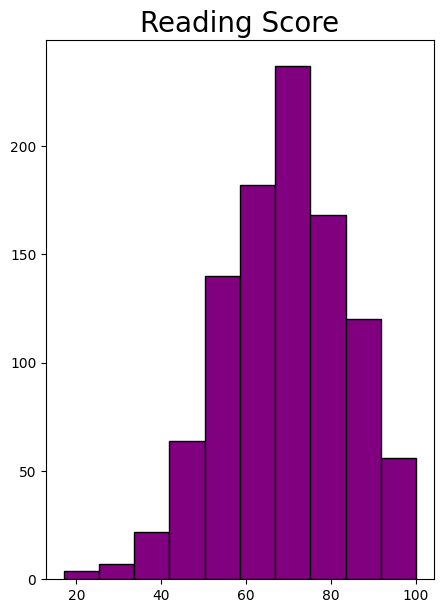

In [68]:
plt.figure(figsize=(5,7))
plt.title("Reading Score",fontsize=20)
plt.hist(x=df["reading_score"],color='purple', edgecolor='black')
plt.show()

## Grafik Histogram dari variabel writing_score

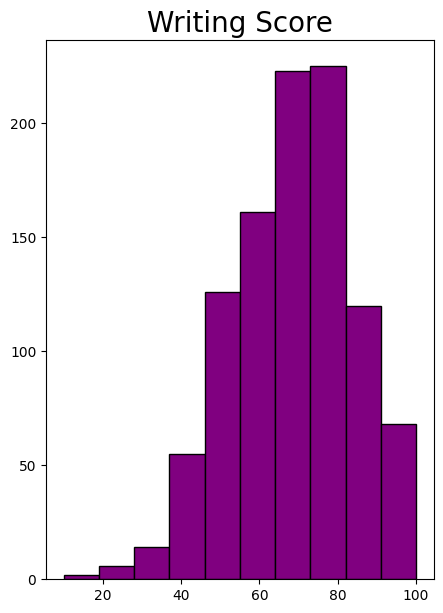

In [69]:
plt.figure(figsize=(5,7))
plt.title("Writing Score",fontsize=20)
plt.hist(x=df["writing_score"],color='purple', edgecolor='black')
plt.show()

## B.Menentukan nilai Tendensi Central: Rata-rata, Median, Modus, Min dan Max dari data reading_score dan writing_score

In [61]:
df[["reading_score","writing_score"]].describe()

,reading_score,writing_score
count,1000.000000,1000.000000
mean,69.169000,68.054000
std,14.600192,15.195657
min,17.000000,10.000000
25%,59.000000,57.750000
50%,70.000000,69.000000
75%,79.000000,79.000000
max,100.000000,100.000000


In [76]:
modus_read=df["reading_score"].value_counts().rename_axis("Reading Score").reset_index(name="Jumlah Data")
modus_read.head(3)

,Reading Score,Jumlah Data
0,72,34
1,74,33
2,64,32


In [77]:
modus_write=df["writing_score"].value_counts().rename_axis("Writing Score").reset_index(name="Jumlah Data")
modus_write.head(3)

,Writing Score,Jumlah Data
0,74,35
1,70,33
2,68,31


## C.Menentukan nilai Variasi: Jangkauan Range, Kisaran Interkuartil, Varians, Standar Deviasi data reading_score dan writing_score.

In [4]:
# Jangkauan Range
df[["reading_score","writing_score"]].min() - df[["reading_score","writing_score"]].max()

reading_score   -83
writing_score   -90
dtype: int64

In [5]:
# Kisaran Interkuartil
df[["reading_score","writing_score"]].quantile(0.75) - df[["reading_score","writing_score"]].quantile(0.25)

reading_score    20.00
writing_score    21.25
dtype: float64

In [105]:
# varians
df[["reading_score","writing_score"]].var()

reading_score    213.165605
writing_score    230.907992
dtype: float64

In [106]:
# Standar Deviasi
df[["reading_score","writing_score"]].std()

reading_score    14.600192
writing_score    15.195657
dtype: float64

## D.Membuat Grafik Boxplot dan menentukan nilai skewness dan kurtosis

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


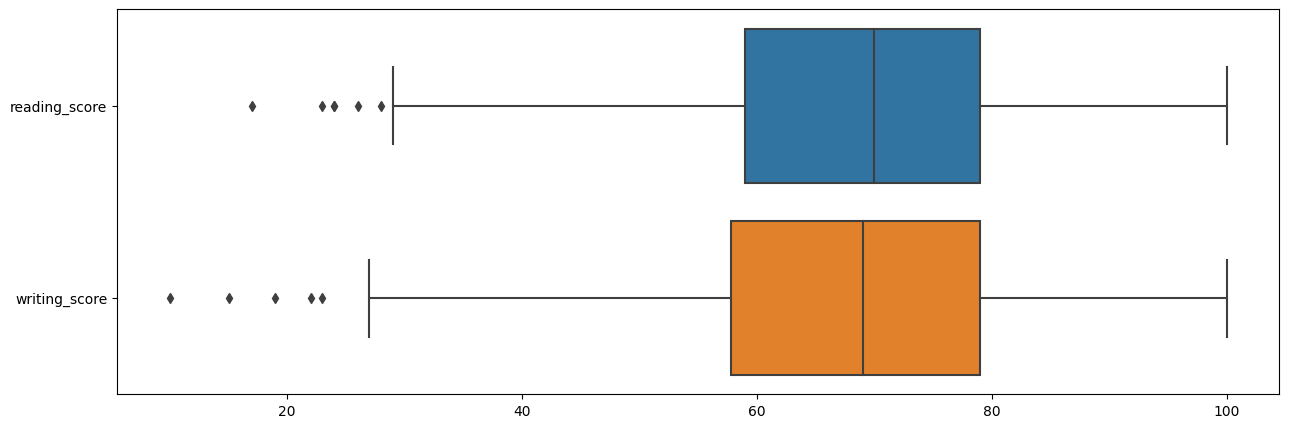

In [91]:
plt.figure(figsize=(15,5))
sns.boxplot(df[["reading_score","writing_score"]],orient='h')
plt.show()

In [92]:
df[["reading_score","writing_score"]].skew()

reading_score   -0.259105
writing_score   -0.289444
dtype: float64

In [93]:
df[["reading_score","writing_score"]].kurt()

reading_score   -0.068265
writing_score   -0.033365
dtype: float64

## E.Scatterplot dari variabel reading_score vs writing_score

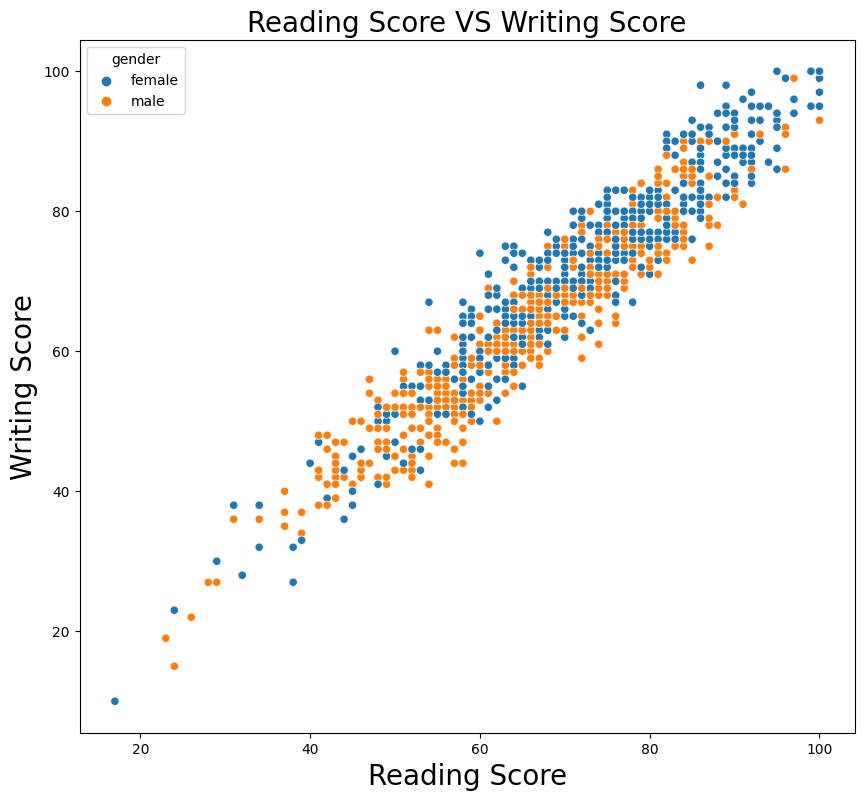

In [113]:
plt.figure(figsize=(10,9))
plt.title("Reading Score VS Writing Score",fontsize=20)
sns.scatterplot(x=df['reading_score'],y=df['writing_score'],hue=df['gender'])
plt.xlabel("Reading Score",fontsize=20)
plt.ylabel("Writing Score",fontsize=20)
plt.show()